In [1]:
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [31]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
dataDF = pd.DataFrame(data, columns=data.columns)
# datataDF['Chance of Admit '] = data.target

In [32]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:>

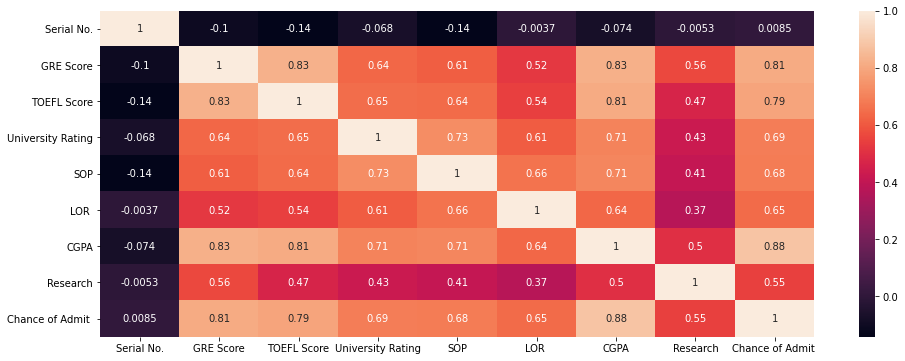

In [33]:
C = data.corr()
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

In [37]:
datata = dataDF[data.Research==0]
Data = datata[['TOEFL Score', 'CGPA']]
Data.head()
# datata

,TOEFL Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30


In [38]:
np.shape(Data)

(220, 2)

In [39]:
score = Data['TOEFL Score']
cgpa = Data['CGPA']
A = np.column_stack((np.ones(220), score, cgpa))
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [24]:
np.set_printoptions(suppress=True)
A

array([[  1.  , 118.  ,   9.65],
       [  1.  , 107.  ,   8.87],
       [  1.  , 104.  ,   8.  ],
       ...,
       [  1.  , 120.  ,   9.56],
       [  1.  , 103.  ,   8.43],
       [  1.  , 113.  ,   9.04]])

In [41]:
y = datata[['Chance of Admit ']]

In [42]:
w_hat = np.linalg.inv(A.T@A)@A.T@y
w_hat

,Chance of Admit
0,-1.044864
1,0.004427
2,0.148077


In [45]:
w_hat = round(w_hat, 3)
w_hat

,Chance of Admit
0,-1.045
1,0.004
2,0.148


In [47]:
score_new = 107
cgpa_new = 9.1

chance_new = w_hat.iloc[0]+w_hat.iloc[1]*score_new+w_hat.iloc[2]*cgpa_new
chance_new

Chance of Admit     0.7298
dtype: float64

In [52]:
score_c = score - score.mean()

cgpa_c = cgpa - cgpa.mean()

y_c = y - y.mean()

score_st = score_c / np.linalg.norm(score_c)

cgpa_st = cgpa_c / np.linalg.norm(cgpa_c)

y_st = y_c / np.linalg.norm(y_c)

A_st=np.column_stack(( score_st, cgpa_st))

w_hat_st = np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values

w_hat_st

array([[0.19044768],
       [0.62001517]])